# IMPORT DATASET

Sumber dataset: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [146]:
import pandas as pd 
heartdisease = pd.read_csv('D:/BigDataFinalProject/data/heart_disease_uci.csv')
print(heartdisease.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


# SUMMARIZE DATASET

In [147]:
# Dimensi Dataset
heartdisease.shape

(920, 16)

In [148]:
# Ringkasan Statistik 
heartdisease.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [149]:
# Periksa missing values
heartdisease.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [150]:
# Data types
heartdisease.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [151]:
# Cek % missing values di tiap kolom
missing_persen = heartdisease.isnull().mean() * 100
missing_persen = missing_persen[missing_persen > 0] # Hanya tampilkan yang ada missing
missing_persen = missing_persen.sort_values(ascending=False)
print("% Missing Values per Kolom")
print(missing_persen)

% Missing Values per Kolom
ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
dtype: float64


In [152]:
heartdisease[heartdisease.duplicated()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [153]:
heartdisease.describe(include=['object'])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'num'}>,
        <Axes: >]], dtype=object)

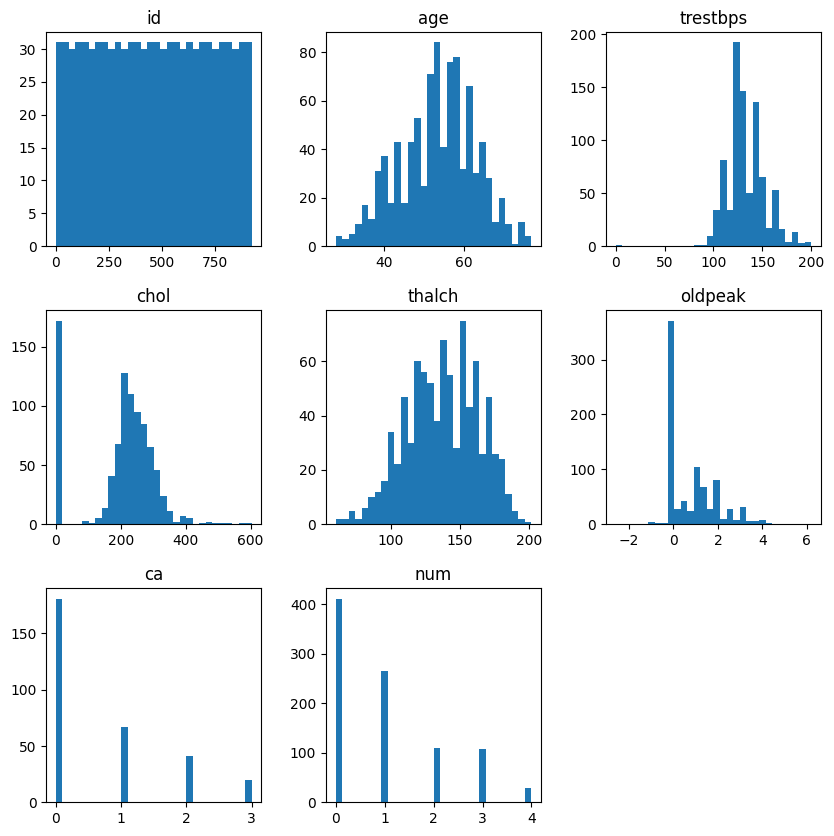

In [154]:
# Histogram untuk kolom numerik
heartdisease.hist(figsize=(10, 10), bins=30, grid=False)

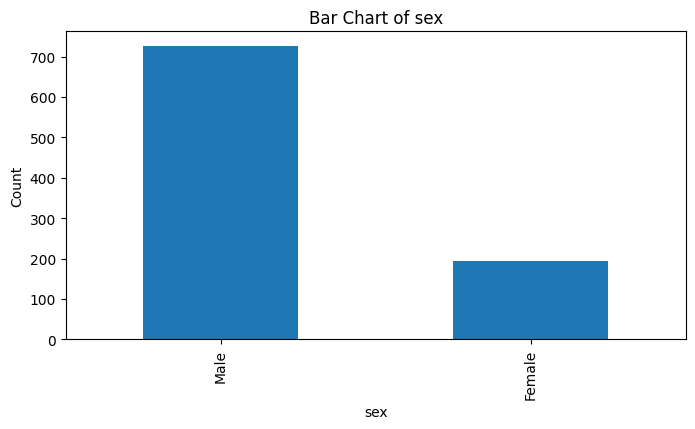

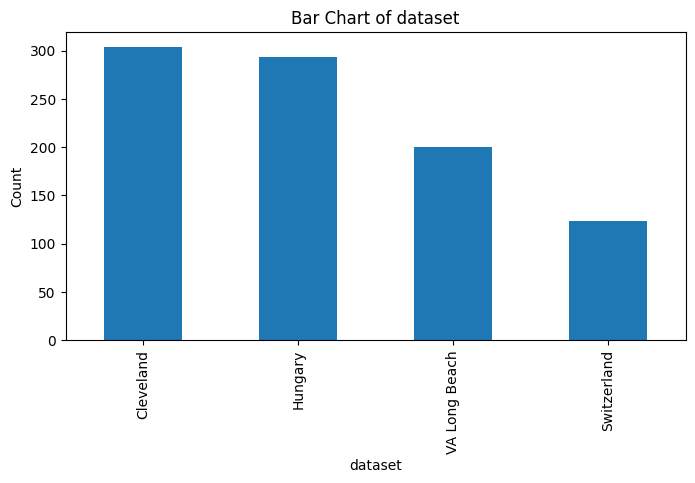

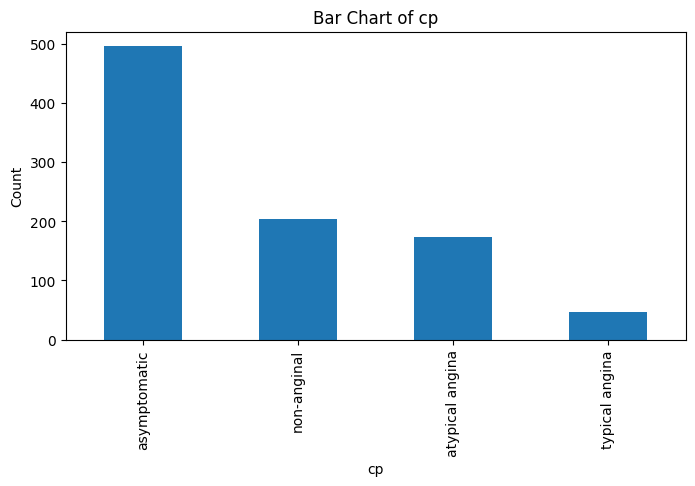

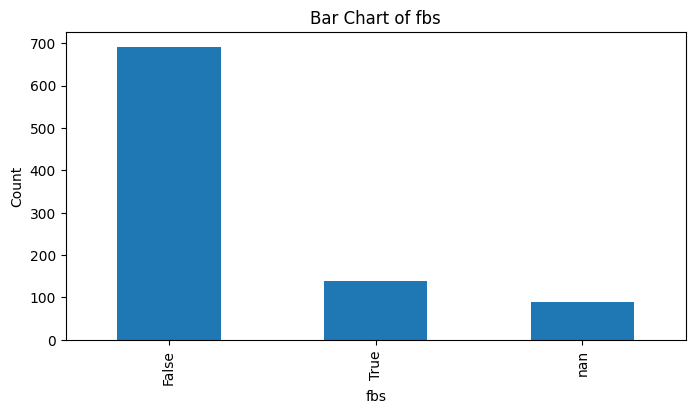

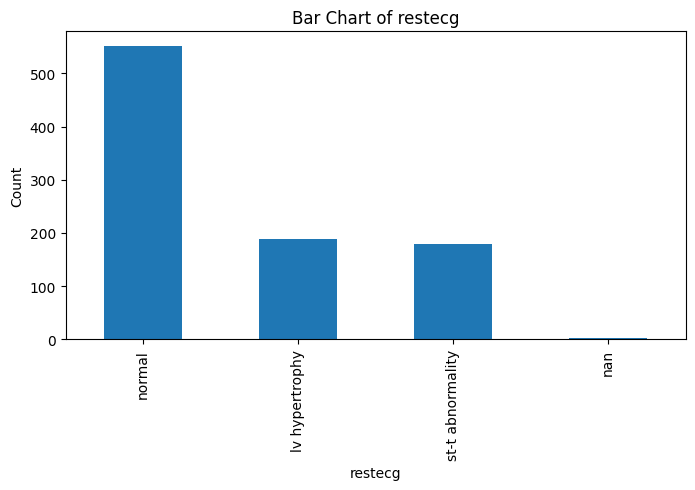

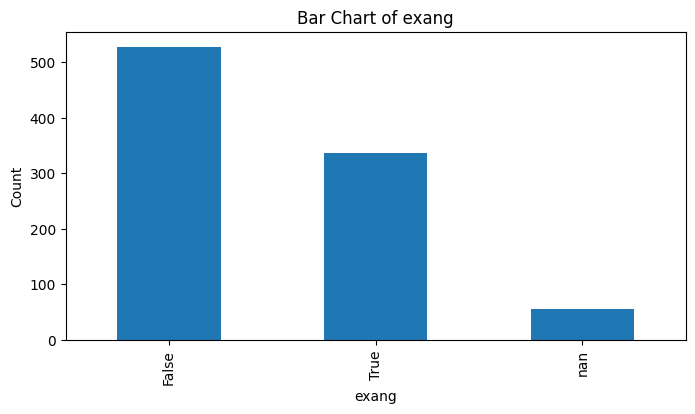

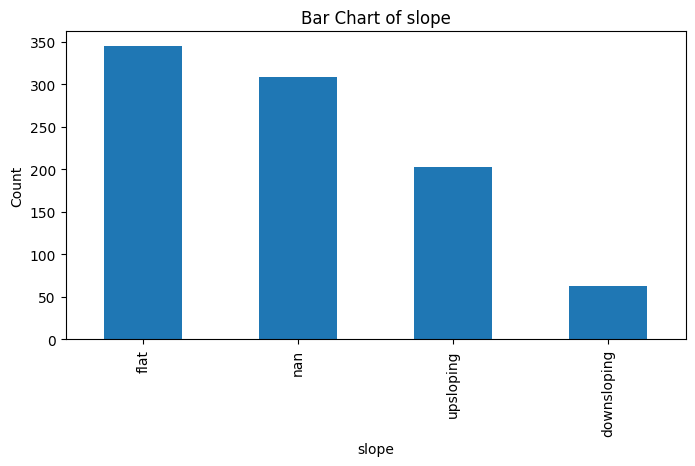

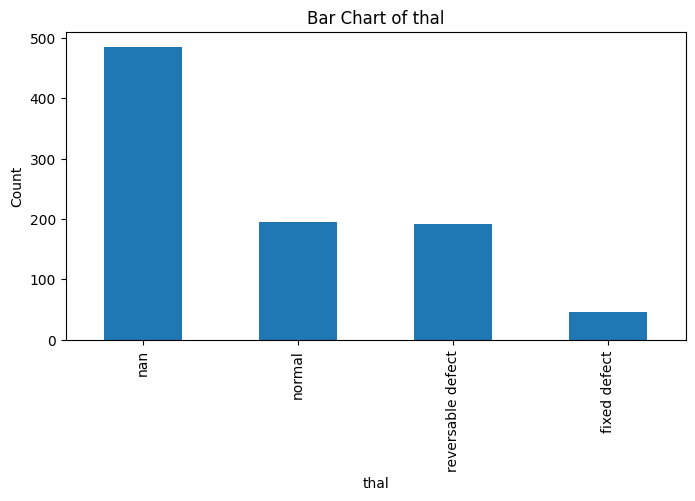

In [155]:
import matplotlib.pyplot as plt

# Plot bar chart untuk kolom kategorikal 
object_cols = heartdisease.select_dtypes(include='object').columns

for col in object_cols:
    plt.figure(figsize=(8, 4))
    heartdisease[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# NUMERIC COLUMNS

In [156]:
# Drop kolom ID 
heartdisease = heartdisease.drop(columns=['id'])

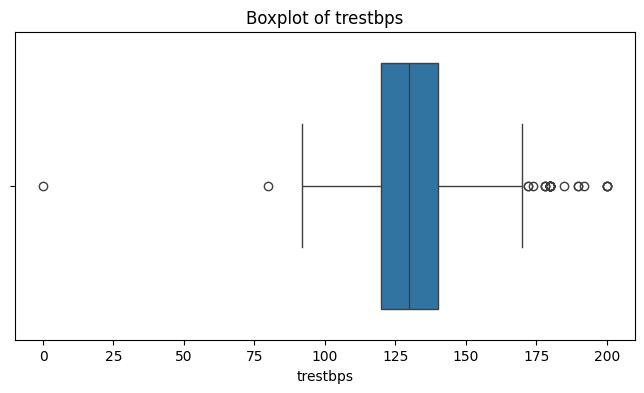

In [157]:
# Trestbps (Tekanan Darah)
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=heartdisease['trestbps'])
plt.title('Boxplot of trestbps')
plt.xlabel('trestbps')
plt.show()

In [158]:
Q1 = heartdisease['trestbps'].quantile(0.25)
Q3 = heartdisease['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_data = heartdisease[(heartdisease['trestbps'] < lower_bound) | (heartdisease['trestbps'] > upper_bound)]
display(outlier_data)
# Outlier memang data valid jadi tidak usah dihapus

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
14,52,Male,Cleveland,non-anginal,172.0,199.0,True,normal,162.0,False,0.5,upsloping,0.0,reversable defect,0
83,68,Male,Cleveland,non-anginal,180.0,274.0,True,lv hypertrophy,150.0,True,1.6,flat,0.0,reversable defect,3
126,56,Female,Cleveland,asymptomatic,200.0,288.0,True,lv hypertrophy,133.0,True,4.0,downsloping,2.0,reversable defect,3
172,59,Female,Cleveland,asymptomatic,174.0,249.0,False,normal,143.0,True,0.0,flat,0.0,normal,1
183,59,Male,Cleveland,typical angina,178.0,270.0,False,lv hypertrophy,145.0,False,4.2,downsloping,0.0,reversable defect,0
188,54,Male,Cleveland,atypical angina,192.0,283.0,False,lv hypertrophy,195.0,False,0.0,upsloping,1.0,reversable defect,1
201,64,Female,Cleveland,asymptomatic,180.0,325.0,False,normal,154.0,True,0.0,upsloping,0.0,normal,0
213,66,Female,Cleveland,asymptomatic,178.0,228.0,True,normal,165.0,True,1.0,flat,2.0,reversable defect,3
231,55,Female,Cleveland,asymptomatic,180.0,327.0,False,st-t abnormality,117.0,True,3.4,flat,0.0,normal,2
338,39,Male,Hungary,atypical angina,190.0,241.0,False,normal,106.0,False,0.0,NaN,NaN,NaN,0


In [159]:
# Terdapat outlier pada kolom 'trestbps', maka handling missing values dengan imputasi median
heartdisease['trestbps'].fillna(heartdisease['trestbps'].median(), inplace=True)
# Cek missing values setelah imputasi pada kolom 'trestbps'
print("Missing values after imputation in 'trestbps':", heartdisease['trestbps'].isnull().sum())

Missing values after imputation in 'trestbps': 0


C:\Users\Soft_Zone\AppData\Local\Temp\ipykernel_9848\2169839316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heartdisease['trestbps'].fillna(heartdisease['trestbps'].median(), inplace=True)


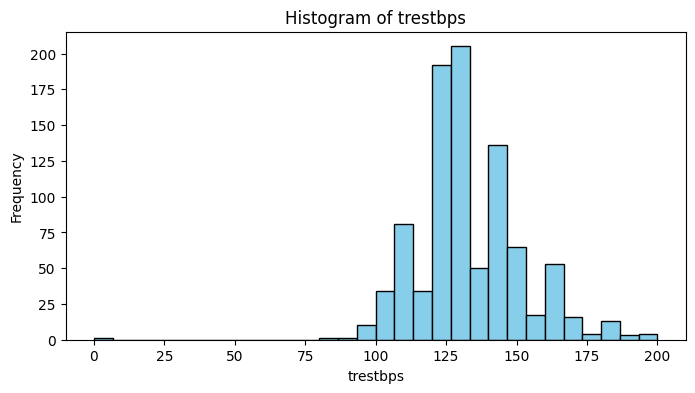

In [160]:
# Histogram untuk kolom 'trestbps'
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['trestbps'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of trestbps')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.show()

In [161]:
# Chol (Kolesterol)

import numpy as np

# Ubah nilai 0 pada kolom 'chol' menjadi NaN
heartdisease['chol'] = heartdisease['chol'].replace(0, np.nan)

In [162]:
print("Missing values Chol setelah 0 menjadi null:", heartdisease['chol'].isnull().sum())

Missing values Chol setelah 0 menjadi null: 202


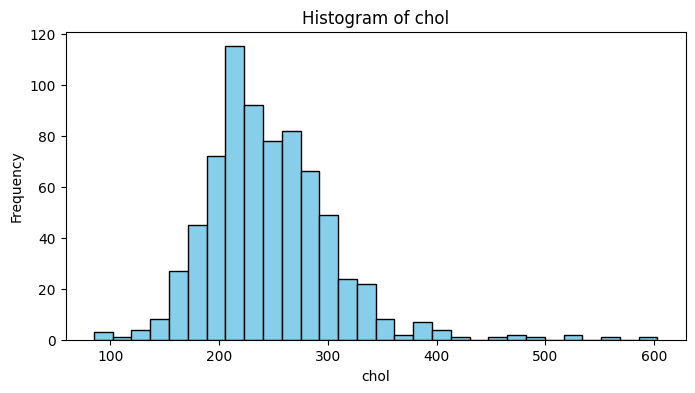

In [163]:
# Histogram untuk kolom 'chol'
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['chol'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of chol')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()

In [164]:
# Chol berdistribusi normal, jadi handling missing values dengan imputasi mean
heartdisease['chol'].fillna(heartdisease['chol'].mean(), inplace=True)

C:\Users\Soft_Zone\AppData\Local\Temp\ipykernel_9848\55931803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heartdisease['chol'].fillna(heartdisease['chol'].mean(), inplace=True)


In [165]:
print("Missing values Chol setelah imputasi:", heartdisease['chol'].isnull().sum())

Missing values Chol setelah imputasi: 0


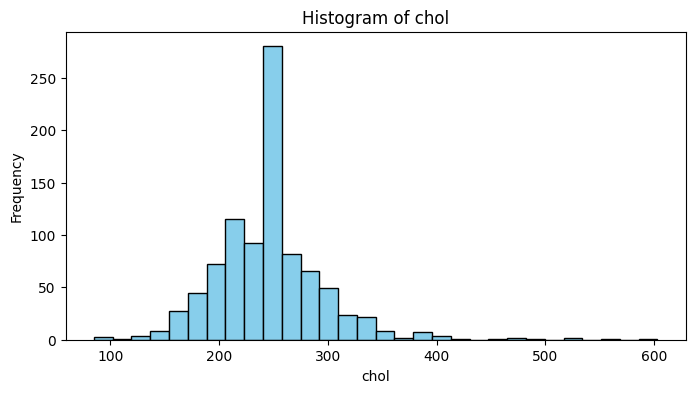

In [166]:
# Histogram untuk kolom 'chol'
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['chol'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of chol')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()

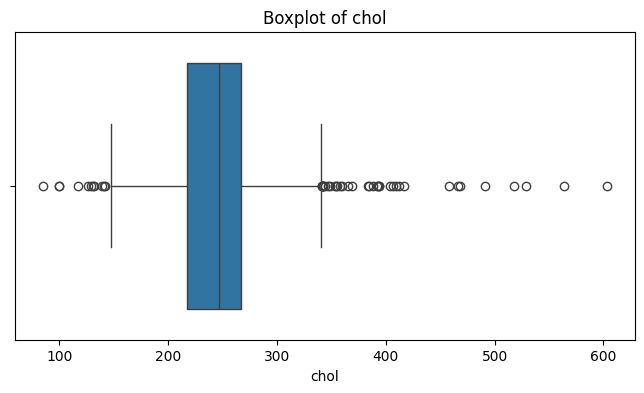

In [167]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=heartdisease['chol'])
plt.title('Boxplot of chol')
plt.xlabel('chol')
plt.show()
# Jika mau lebih robust nanti isi pakai median

In [168]:
# Thalch (Maksimum Denyut Jantung) -> anggap penting jadi imputasi median
heartdisease['thalch'].fillna(heartdisease['thalch'].median(), inplace=True)

C:\Users\Soft_Zone\AppData\Local\Temp\ipykernel_9848\2316964273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heartdisease['thalch'].fillna(heartdisease['thalch'].median(), inplace=True)


In [169]:
print("Missing values Thalch setelah imputasi:", heartdisease['thalch'].isnull().sum())

Missing values Thalch setelah imputasi: 0


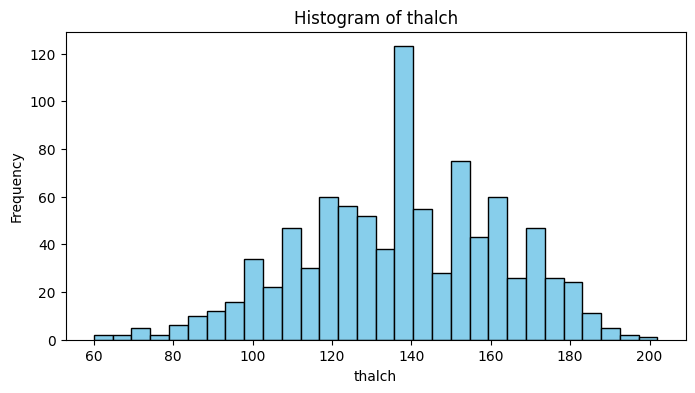

In [170]:
# Histogram untuk kolom 'thalch'
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['thalch'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of thalch')
plt.xlabel('thalch')
plt.ylabel('Frequency')
plt.show()


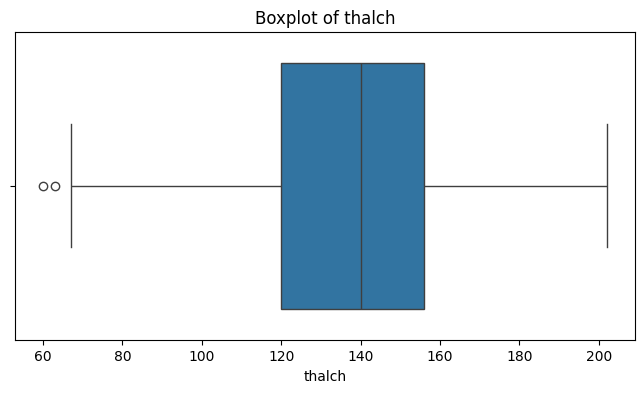

In [171]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=heartdisease['thalch'])
plt.title('Boxplot of thalch')
plt.xlabel('thalch')
plt.show()

In [172]:
# Oldpeak (Depresi ST tidak mungkin negatif, jadi ganti dengan 0)
heartdisease.loc[heartdisease['oldpeak'] < 0, 'oldpeak'] = 0

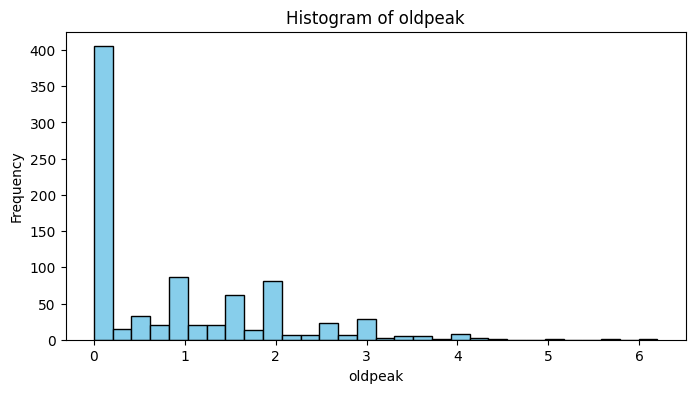

In [173]:
# Histogram untuk kolom 'oldpeak'
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['oldpeak'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

In [174]:
print("Missing values oldpeak:", heartdisease['oldpeak'].isnull().sum())

Missing values oldpeak: 62


In [175]:
# Imputasi dengan median 
median_oldpeak = heartdisease['oldpeak'].median()
heartdisease['oldpeak'].fillna(median_oldpeak, inplace=True)

C:\Users\Soft_Zone\AppData\Local\Temp\ipykernel_9848\531252664.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heartdisease['oldpeak'].fillna(median_oldpeak, inplace=True)


In [176]:
print("Missing values oldpeak setelah imputasi:", heartdisease['oldpeak'].isnull().sum())

Missing values oldpeak setelah imputasi: 0


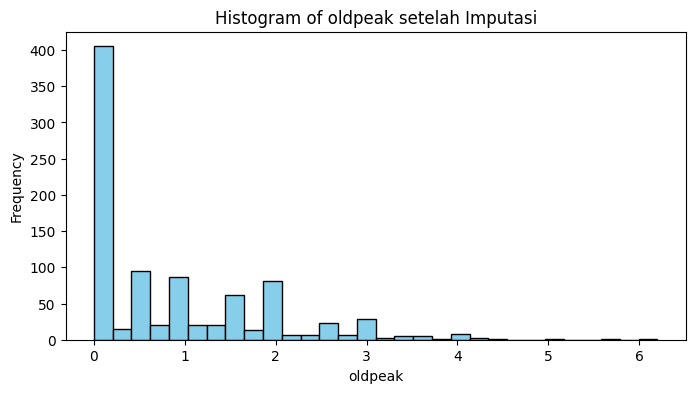

In [177]:
# Histogram untuk kolom 'oldpeak'
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['oldpeak'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of oldpeak setelah Imputasi')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()
# Anggap saja oldpeak = 0 adalah normal secara medis, jadi tidak perlu dihapus 

In [178]:
# ca (Jumlah pembuluh darah yang terdeteksi)
print("Missing values ca", heartdisease['ca'].isnull().sum())

Missing values ca 611


In [179]:
# drop kolom ca 
heartdisease = heartdisease.drop(columns=['ca'])

In [180]:
# num (target)
print("Missing values num", heartdisease['num'].isnull().sum())

Missing values num 0


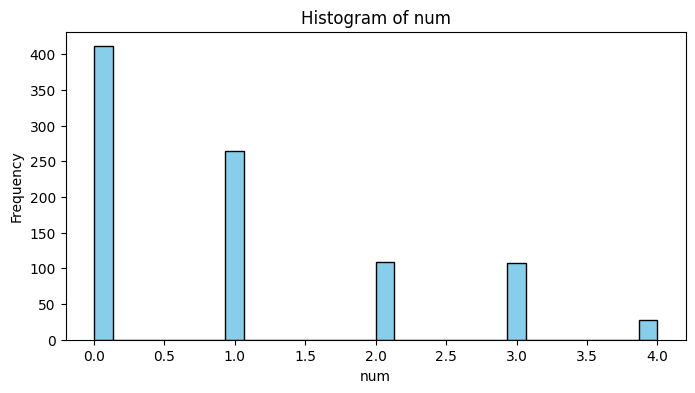

In [181]:
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['num'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of num')
plt.xlabel('num')
plt.ylabel('Frequency')
plt.show()


In [182]:
print(heartdisease.groupby('num').size())

num
0    411
1    265
2    109
3    107
4     28
dtype: int64


In [183]:
# pip install imbalanced-learn

In [184]:
print("Missing values num:", heartdisease['num'].isnull().sum())

Missing values num: 0


In [185]:
heartdisease.describe(include="object")

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [186]:
# Kolom fbs (Gula Darah Puasa > 120 mg/dl?)
import numpy as np

# Hitung proporsi
prop_false = (heartdisease['fbs'] == False).sum() / heartdisease['fbs'].notnull().sum()
prop_true = (heartdisease['fbs'] == True).sum() / heartdisease['fbs'].notnull().sum()

# Ambil index missing
missing_idx = heartdisease[heartdisease['fbs'].isnull()].index
n_missing = len(missing_idx)
n_false = int(prop_false * n_missing)
n_true = n_missing - n_false

# Buat array imputasi
impute_values = np.array([False]*n_false + [True]*n_true)
np.random.shuffle(impute_values)

# Imputasi secara proporsional lebih baik daripada pakai modus
heartdisease.loc[missing_idx, 'fbs'] = impute_values


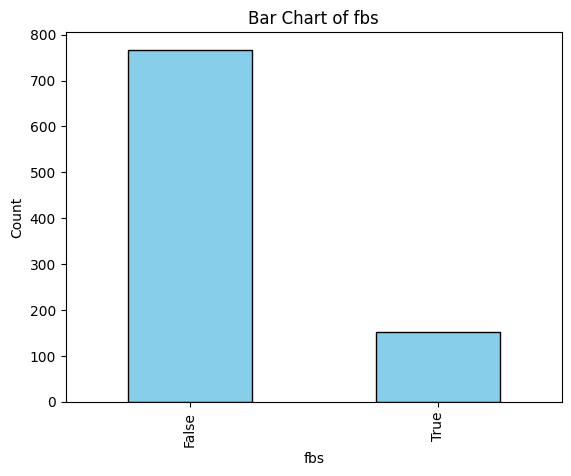

In [187]:
import matplotlib.pyplot as plt
# Bar chart fbs
heartdisease['fbs'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of fbs')
plt.xlabel('fbs')
plt.ylabel('Count')
plt.show()

In [188]:
# restecg (Hasil Elektrokardiogram Istirahat)
# Imputasi dengan modus
modus_restecg = heartdisease['restecg'].mode()[0]
heartdisease['restecg'].fillna(modus_restecg, inplace=True)

C:\Users\Soft_Zone\AppData\Local\Temp\ipykernel_9848\2513872927.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heartdisease['restecg'].fillna(modus_restecg, inplace=True)


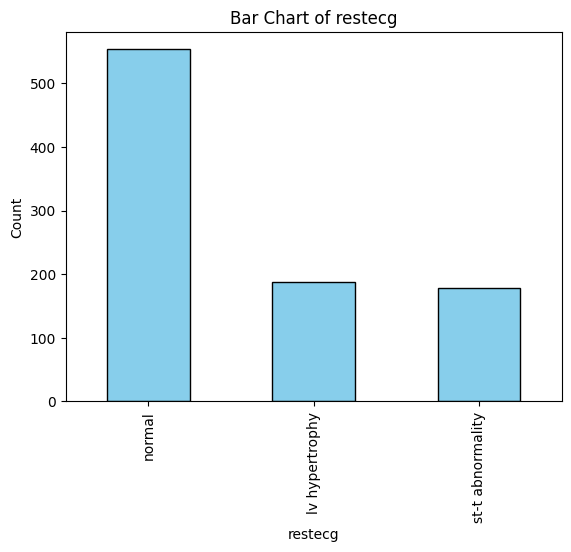

In [189]:
# Bar chart restecg
heartdisease['restecg'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of restecg')
plt.xlabel('restecg')
plt.ylabel('Count')
plt.show()

In [190]:
# Exang (Apakah pasien mengalami angina akibat olahraga?)
# Hitung proporsi
prop_false = (heartdisease['exang'] == False).sum() / heartdisease['exang'].notnull().sum()
prop_true = (heartdisease['exang'] == True).sum() / heartdisease['exang'].notnull().sum()

# Ambil index missing
missing_idx = heartdisease[heartdisease['exang'].isnull()].index
n_missing = len(missing_idx)
n_false = int(prop_false * n_missing)
n_true = n_missing - n_false

# Buat array imputasi
impute_values = np.array([False]*n_false + [True]*n_true)
np.random.shuffle(impute_values)

# Imputasi secara proporsional
heartdisease.loc[missing_idx, 'exang'] = impute_values

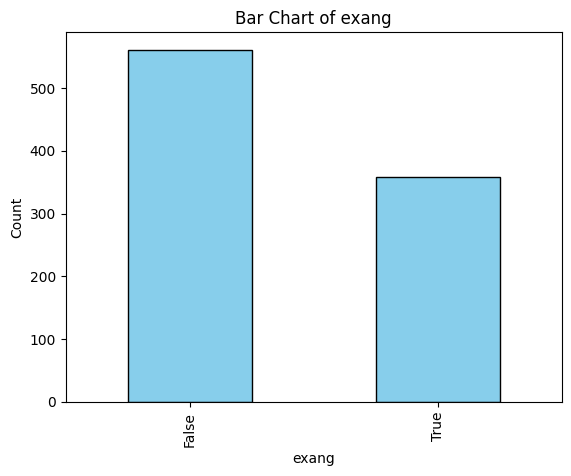

In [191]:
# Bar chart exang
heartdisease['exang'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of exang')
plt.xlabel('exang')
plt.ylabel('Count')
plt.show()

In [192]:
# Kolom slope (Tipe Slope Segmen ST)
# Hitung proporsi tiap kategori pada data yang tidak null
prop_flat = (heartdisease['slope'] == 'flat').sum() / heartdisease['slope'].notnull().sum()
prop_up = (heartdisease['slope'] == 'upslopping').sum() / heartdisease['slope'].notnull().sum()
prop_down = (heartdisease['slope'] == 'downslopping').sum() / heartdisease['slope'].notnull().sum()

# Ambil index missing
missing_idx = heartdisease[heartdisease['slope'].isnull()].index
n_missing = len(missing_idx)
n_flat = int(prop_flat * n_missing)
n_up = int(prop_up * n_missing)
n_down = n_missing - n_flat - n_up

# Buat array imputasi
impute_values = np.array(['flat']*n_flat + ['upslopping']*n_up + ['downslopping']*n_down)
np.random.shuffle(impute_values)

# Imputasi secara proporsional
heartdisease.loc[missing_idx, 'slope'] = impute_values

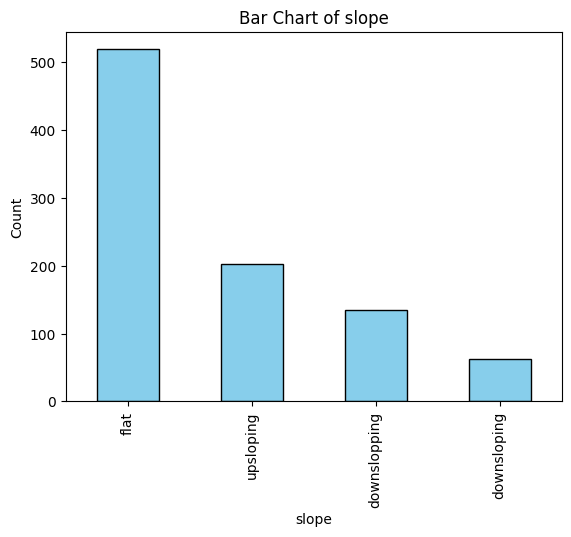

In [193]:
# Bar chart slope
heartdisease['slope'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of slope')
plt.xlabel('slope')
plt.ylabel('Count')
plt.show()

In [194]:
# Thal (Kondisi Thalassemia) null > 50% drop kolom
heartdisease = heartdisease.drop(columns=['thal'])

In [195]:
# Check for missing values
heartdisease.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [196]:
heartdisease.shape

(920, 13)

In [197]:
# drop column 'dataset'
heartdisease = heartdisease.drop(columns=['dataset'])

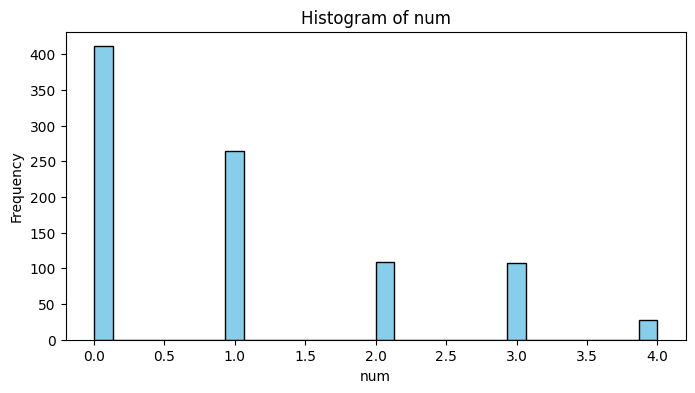

In [198]:
plt.figure(figsize=(8, 4))
plt.hist(heartdisease['num'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of num')
plt.xlabel('num')
plt.ylabel('Frequency')
plt.show()

# LABEL ENCODING

In [199]:
# Sex
# Label encoding untuk kolom 'sex' (male/female)
heartdisease['sex'] = heartdisease['sex'].map({'Male': 1, 'Female': 0})

In [200]:
# cp
# Tidak ada urutan (nominal), gunakan One-Hot Encoding
# One-Hot Encoding untuk kolom cp
heartdisease = pd.get_dummies(heartdisease, columns=['cp'], dtype=int)

In [201]:
# fbs
# Label encoding untuk kolom 'fbs' (True/False)
heartdisease['fbs'] = heartdisease['fbs'].map({True: 1, False: 0})

In [202]:
# restecg

from sklearn.preprocessing import LabelEncoder
# Gunakan label encoding (untuk tree-based models)
le_restecg = LabelEncoder()
heartdisease['restecg'] = le_restecg.fit_transform(heartdisease['restecg'])
print(dict(zip(le_restecg.classes_, le_restecg.transform(le_restecg.classes_))))

{'lv hypertrophy': np.int64(0), 'normal': np.int64(1), 'st-t abnormality': np.int64(2)}


In [203]:
# Exang
heartdisease['exang'] = heartdisease['exang'].map({True: 1, False: 0})

In [204]:
# Slope 
# Gunakan label encoding (untuk tree-based models)
le_slope = LabelEncoder()
heartdisease['slope'] = le_slope.fit_transform(heartdisease['slope'])
print(dict(zip(le_slope.classes_, le_slope.transform(le_slope.classes_))))

{'downsloping': np.int64(0), 'downslopping': np.int64(1), 'flat': np.int64(2), 'upsloping': np.int64(3)}


In [205]:
heartdisease.shape

(920, 15)

In [206]:
heartdisease.head(100)

,age,sex,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,63,1,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0,0,1
1,67,1,160.0,286.0,0,0,108.0,1,1.5,2,2,1,0,0,0
2,67,1,120.0,229.0,0,0,129.0,1,2.6,2,1,1,0,0,0
3,37,1,130.0,250.0,0,1,187.0,0,3.5,0,0,0,0,1,0
4,41,0,130.0,204.0,0,0,172.0,0,1.4,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,1,128.0,255.0,0,1,161.0,1,0.0,3,1,1,0,0,0
96,59,1,110.0,239.0,0,0,142.0,1,1.2,2,2,1,0,0,0
97,60,0,150.0,258.0,0,0,157.0,0,2.6,2,3,1,0,0,0
98,52,1,134.0,201.0,0,1,158.0,0,0.8,3,0,0,1,0,0


In [207]:
heartdisease.isnull().sum()

age                   0
sex                   0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalch                0
exang                 0
oldpeak               0
slope                 0
num                   0
cp_asymptomatic       0
cp_atypical angina    0
cp_non-anginal        0
cp_typical angina     0
dtype: int64

# SMOTE

In [208]:
# Ubah target menjadi binary: 0 = tidak sakit, 1 = sakit
heartdisease['num_binary'] = heartdisease['num'].apply(lambda x: 0 if x == 0 else 1)

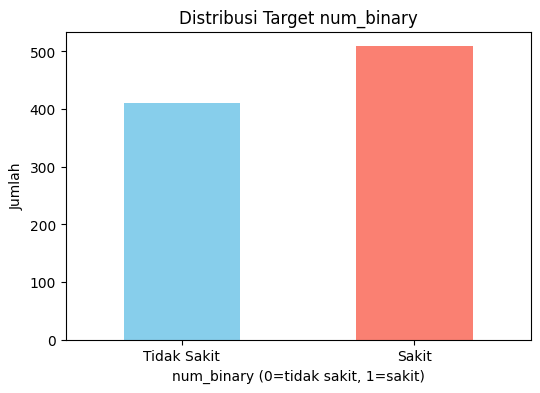

In [209]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
heartdisease['num_binary'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Target num_binary')
plt.xlabel('num_binary (0=tidak sakit, 1=sakit)')
plt.ylabel('Jumlah')
plt.xticks([0,1], ['Tidak Sakit', 'Sakit'], rotation=0)
plt.show()

In [210]:
# # Pisahkan fitur dan target binary
X = heartdisease.drop(columns=['num', 'num_binary'])  
y = heartdisease['num_binary']

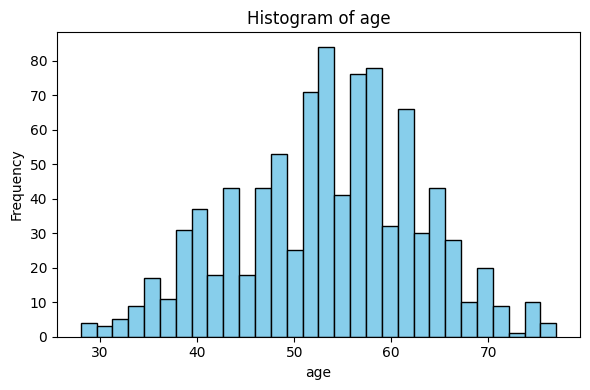

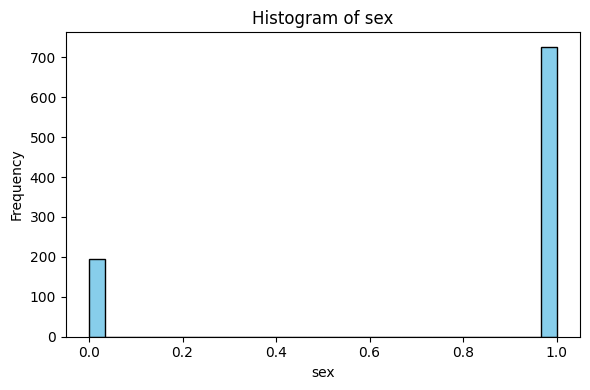

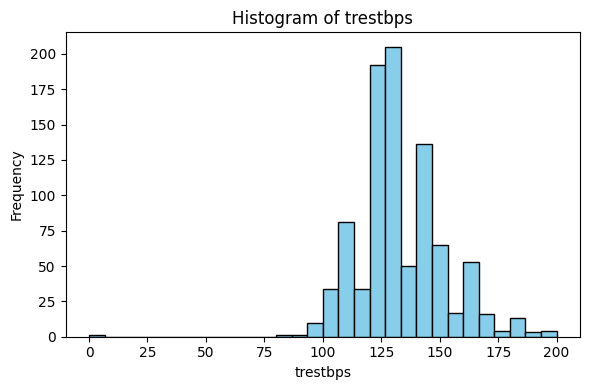

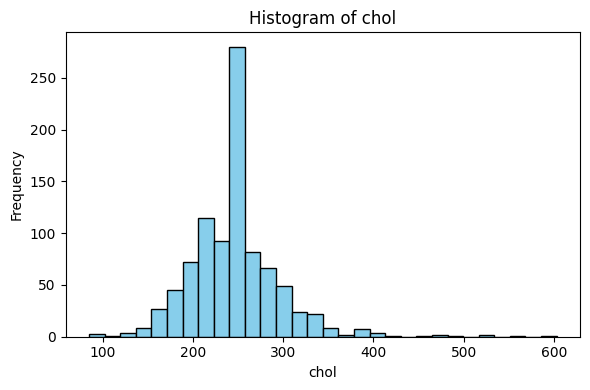

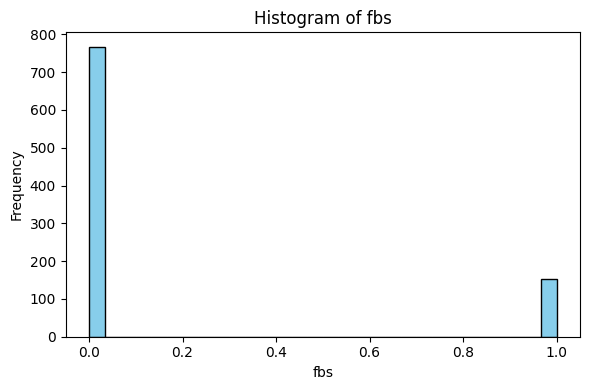

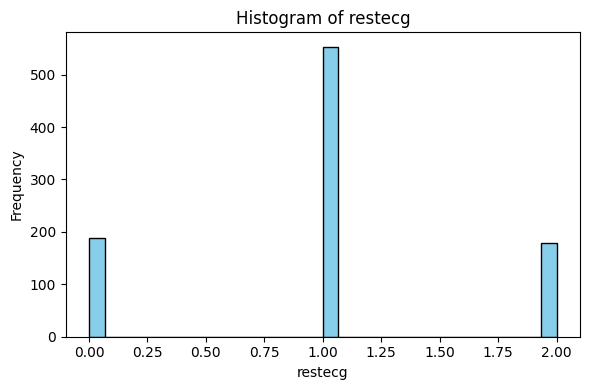

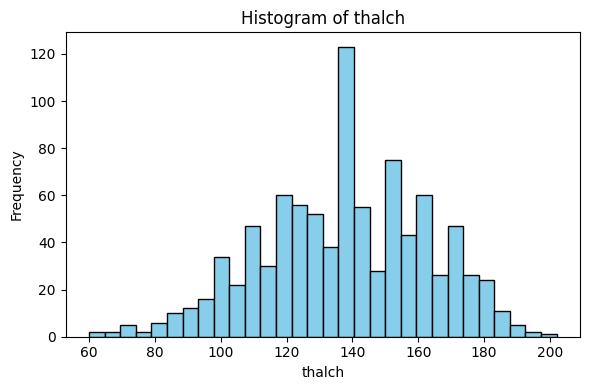

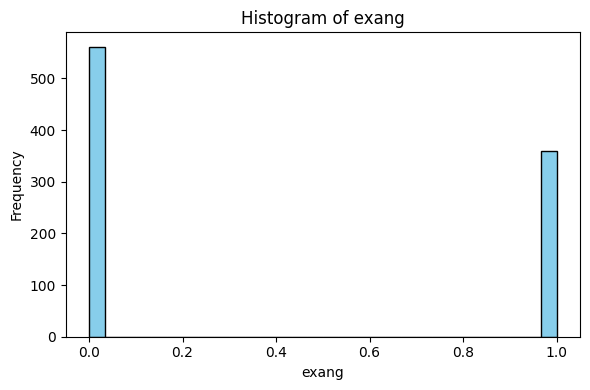

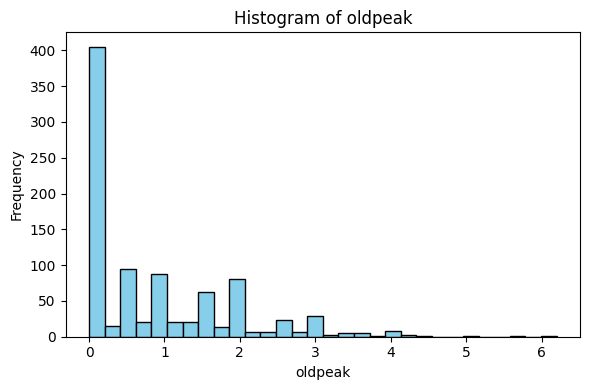

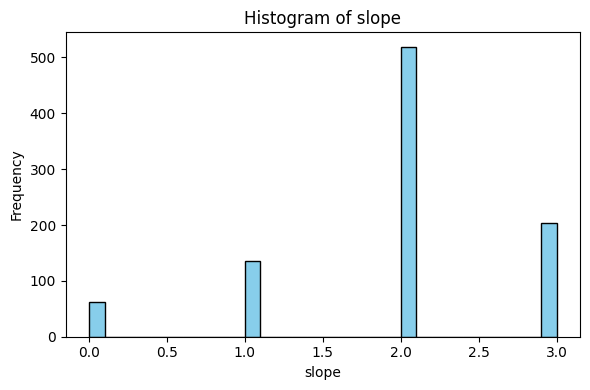

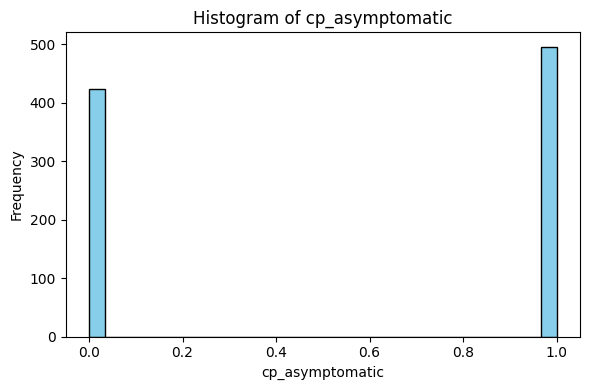

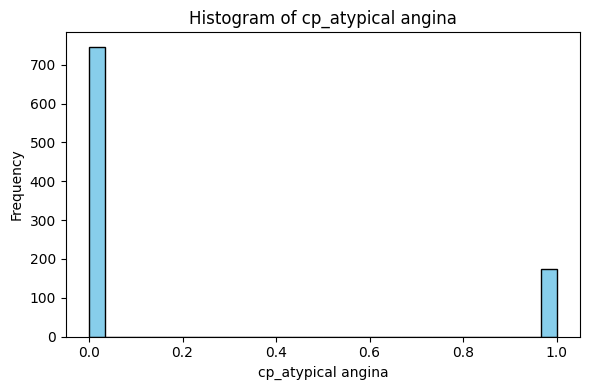

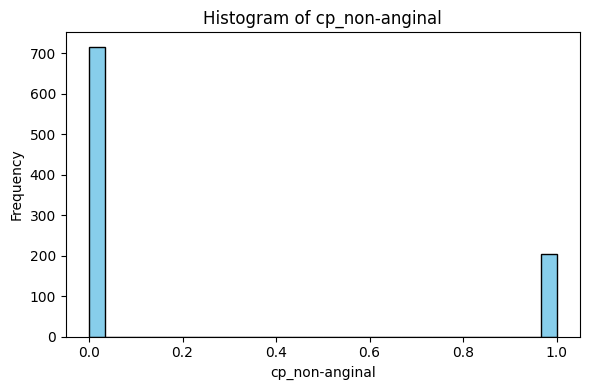

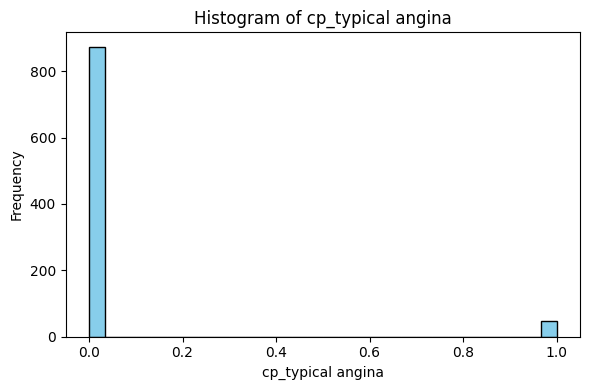

In [211]:
import matplotlib.pyplot as plt

# Semua kolom X numerik (setelah encoding)
for col in X.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [212]:
# Split data menjadi train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# SMOTE hanya pada data train karena untuk memperbagus F1-Score dan Recall
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [214]:
# Cek distribusi kelas sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y_train.value_counts())

Distribusi kelas sebelum SMOTE:
num_binary
1    407
0    329
Name: count, dtype: int64


In [215]:
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Distribusi kelas setelah SMOTE:
num_binary
1    407
0    407
Name: count, dtype: int64


# MODELLING

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(decision_function_shape='ovo', random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Macro F1-score:", f1_score(y_test, y_pred, average='macro'))

C:\Users\Soft_Zone\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Soft_Zone\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
[[62 20]
 [16 86]]
              precision    recall  f1-score   support

           0      0.795     0.756     0.775        82
           1      0.811     0.843     0.827       102

    accuracy                          0.804       184
   macro avg      0.803     0.800     0.801       184
weighted avg      0.804     0.804     0.804       184

Akurasi: 0.8043478260869565
Macro F1-score: 0.8009615384615385

=== Random Forest ===
[[60 22]
 [15 87]]
              precision    recall  f1-score   support

           0      0.800     0.732     0.764        82
           1      0.798     0.853     0.825       102

    accuracy                          0.799       184
   macro avg      0.799     0.792     0.794       184
weighted avg      0.799     0.799     0.798       184

Akurasi: 0.7989130434782609
Macro F1-score: 0.794487879977058

=== KNN ===
[[51 31]
 [30 72]]
              precision    recall  f1-score   support

           0      0.630     0.622     0.626 

In [217]:
print("Distribusi kelas pada data test:")
print(y_test.value_counts())

Distribusi kelas pada data test:
num_binary
1    102
0     82
Name: count, dtype: int64


In [218]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Inisialisasi model XGBoost multiclass
xgb = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, eval_metric='mlogloss', use_label_encoder=False)

# Training
xgb.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_xgb = xgb.predict(X_test)

# Evaluasi
print("\n=== XGBoost ===")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=3))
print("Akurasi:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1-score:", f1_score(y_test, y_pred_xgb, average='macro'))

C:\Users\Soft_Zone\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [01:02:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
[[63 19]
 [16 86]]
              precision    recall  f1-score   support

           0      0.797     0.768     0.783        82
           1      0.819     0.843     0.831       102

    accuracy                          0.810       184
   macro avg      0.808     0.806     0.807       184
weighted avg      0.809     0.810     0.809       184

Akurasi: 0.8097826086956522
Macro F1-score: 0.8067632850241546


In [219]:
# Feature Selection dengan Random Forest dan XGBoost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# 1. Fit Random Forest untuk dapatkan feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# 2. Urutkan fitur berdasarkan importance
importances = rf.feature_importances_
feature_names = X_train_resampled.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importance:\n", feat_imp)

# 3. Pilih, misal, 8 fitur teratas
top_features = feat_imp.head(8).index.tolist()
print("Top features:", top_features)

# 4. Gunakan hanya fitur terpilih untuk modelling
X_train_sel = X_train_resampled[top_features]
X_test_sel = X_test[top_features]

# 5. Modelling ulang dengan XGBoost pada fitur yg dipilih tadi
xgb = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, eval_metric='mlogloss')
xgb.fit(X_train_sel, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_sel)

# 6. Evaluasi hasil
print("\n=== XGBoost (Feature Selected) ===")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=3))
print("Akurasi:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1-score:", f1_score(y_test, y_pred_xgb, average='macro'))

Feature Importance:
 age                   0.136840
thalch                0.131986
cp_asymptomatic       0.123612
chol                  0.114843
oldpeak               0.108204
exang                 0.097510
trestbps              0.086168
sex                   0.055469
slope                 0.039470
restecg               0.033123
cp_atypical angina    0.031255
fbs                   0.018093
cp_non-anginal        0.014345
cp_typical angina     0.009083
dtype: float64
Top features: ['age', 'thalch', 'cp_asymptomatic', 'chol', 'oldpeak', 'exang', 'trestbps', 'sex']

=== XGBoost (Feature Selected) ===
[[61 21]
 [23 79]]
              precision    recall  f1-score   support

           0      0.726     0.744     0.735        82
           1      0.790     0.775     0.782       102

    accuracy                          0.761       184
   macro avg      0.758     0.759     0.759       184
weighted avg      0.762     0.761     0.761       184

Akurasi: 0.7608695652173914
Macro F1-score: 0.7585

In [220]:
# Hyperparameter Tuning dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}
xgb = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, eval_metric='mlogloss')
grid = GridSearchCV(xgb, param_grid, scoring='f1_macro', cv=3)
grid.fit(X_train_sel, y_train_resampled)
print("Best params:", grid.best_params_)
print("Best macro F1:", grid.best_score_)

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best macro F1: 0.8131293802873589


In [221]:
# Latih ulang XGBoost dengan best params dari GridSearchCV
xgb_best = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    random_state=42,
    eval_metric='mlogloss',
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200
)
xgb_best.fit(X_train_sel, y_train_resampled)
y_pred_best = xgb_best.predict(X_test_sel)

# Evaluasi pada data test
print("\n=== XGBoost (Best Params, Test Data) ===")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, digits=3))
print("Akurasi:", accuracy_score(y_test, y_pred_best))
print("Macro F1-score:", f1_score(y_test, y_pred_best, average='macro'))


=== XGBoost (Best Params, Test Data) ===
[[62 20]
 [20 82]]
              precision    recall  f1-score   support

           0      0.756     0.756     0.756        82
           1      0.804     0.804     0.804       102

    accuracy                          0.783       184
   macro avg      0.780     0.780     0.780       184
weighted avg      0.783     0.783     0.783       184

Akurasi: 0.782608695652174
Macro F1-score: 0.7800095648015304


In [222]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Inisialisasi model-model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, eval_metric='mlogloss', learning_rate=0.2, max_depth=7, n_estimators=200)

# Buat ensemble voting classifier (hard voting)
ensemble = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='hard'  # bisa juga 'soft' jika semua model support predict_proba
)

# Latih ensemble pada data train (fitur hasil feature selection)
ensemble.fit(X_train_sel, y_train_resampled)

# Prediksi pada data test
y_pred_ensemble = ensemble.predict(X_test_sel)

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print("\n=== Ensemble VotingClassifier ===")
print(confusion_matrix(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble, digits=3))
print("Akurasi:", accuracy_score(y_test, y_pred_ensemble))
print("Macro F1-score:", f1_score(y_test, y_pred_ensemble, average='macro'))

C:\Users\Soft_Zone\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



=== Ensemble VotingClassifier ===
[[64 18]
 [20 82]]
              precision    recall  f1-score   support

           0      0.762     0.780     0.771        82
           1      0.820     0.804     0.812       102

    accuracy                          0.793       184
   macro avg      0.791     0.792     0.791       184
weighted avg      0.794     0.793     0.794       184

Akurasi: 0.7934782608695652
Macro F1-score: 0.7914827627341048


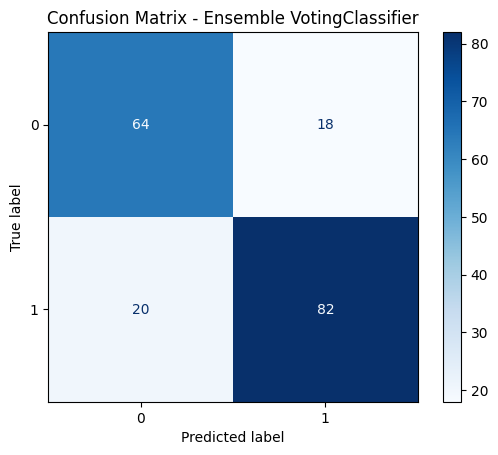

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ensemble, cmap='Blues')
plt.title("Confusion Matrix - Ensemble VotingClassifier")
plt.show()

# FIX MODEL

In [224]:
# === FINAL MODEL: XGBoost ===
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Inisialisasi model XGBoost multiclass
xgb = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42, eval_metric='mlogloss', use_label_encoder=False)

# Training
xgb.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_xgb = xgb.predict(X_test)

# Evaluasi
print("\n=== XGBoost (FINAL MODEL) ===")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=3))
print("Akurasi:", accuracy_score(y_test, y_pred_xgb))
print("Macro F1-score:", f1_score(y_test, y_pred_xgb, average='macro'))

C:\Users\Soft_Zone\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [01:02:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost (FINAL MODEL) ===
[[63 19]
 [16 86]]
              precision    recall  f1-score   support

           0      0.797     0.768     0.783        82
           1      0.819     0.843     0.831       102

    accuracy                          0.810       184
   macro avg      0.808     0.806     0.807       184
weighted avg      0.809     0.810     0.809       184

Akurasi: 0.8097826086956522
Macro F1-score: 0.8067632850241546


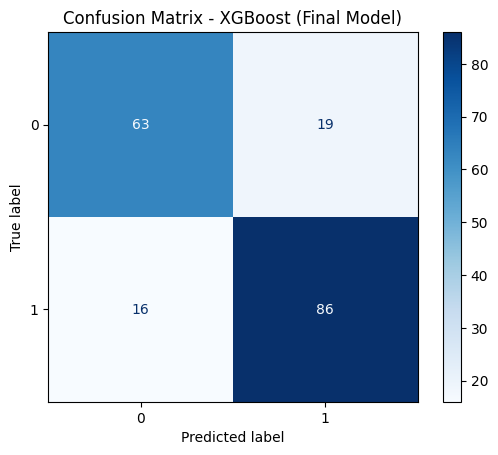

In [225]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualisasi confusion matrix untuk model XGBoost final
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues')
plt.title("Confusion Matrix - XGBoost (Final Model)")
plt.show()

# DEPLOY MODEL

In [226]:
# Simpan model XGBoost final
import joblib
joblib.dump(xgb, 'D:/BigDataFinalProject/model/xgboost_final_model.pkl')

['D:/BigDataFinalProject/model/xgboost_final_model.pkl']